In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.01
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divp', 'divc','asol','eror']
face_vars   = ['velc', 'hvar','asol','eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}


# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

In [3]:
t  = 0.0
nt = 0

ins_stats = dict()

while t <= tmax:
    
    # Calculate predicted velocity: u* = dt*H(u^n)
    flowx.ins.predictor(gridx, gridy, 'velc', 'hvar', Re, dt)
    
    # Calculate RHS for the pressure Poission solver div(u)/dt
    flowx.ins.divergence(gridc, gridx, gridy, 'velc', 'divp', ifac=dt)
    
    # Solve the pressure Poisson equation 
    ins_stats['ites'], ins_stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divp',
                                                                       maxiter=10000, tol=1e-9)
    
    # Calculate corrected velocity u^n+1 = u* - dt * grad(P) 
    flowx.ins.corrector(gridc, gridx, gridy, 'velc', 'pres', dt)
    
    # Calculate divergence of the corrected velocity to display stats
    flowx.ins.divergence(gridc, gridx, gridy, 'velc', 'divc')
    
    # Calculate stats
    ins_stats.update(flowx.ins.stats(gridc, gridx, gridy, 'velc', 'pres', 'divc'))
    
    # Display stats
    if nt % 10 == 0:
        flowx.io.display_stats(t, ins_stats)   
    
    t += dt
    nt += 1
    

------------ Time = 0.0 ---------------
Number of poisson iterations    : 1
Final poisson residual : 0.0
Max, Min, U   : 2.0, 0.0
Max, Min, V   : 0.0, 0.0
Max, Min, P   : 0.0, 0.0
Max, Min, DIV : 0.0, 0.0


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : 5538
Final poisson residual : 9.98778261744523e-10
Max, Min, U   : 2.0, -0.1276021295378761
Max, Min, V   : 0.29587932179126736, -0.3038712901239007
Max, Min, P   : 1.2094198143214747, -0.8703529014661785
Max, Min, DIV : 8.958161501482209e-08, -8.95165846843092e-08


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : 4765
Final poisson residual : 9.98887455683559e-10
Max, Min, U   : 2.0, -0.14215177739944862
Max, Min, V   : 0.3254680445370629, -0.3762157290232419
Max, Min, P   : 1.2229836202495217, -0.7778045378343613
Max, Min, DIV : 9.060888039869042e-08, -9.040188229947344e-08


------------ Time = 0.3000000000000001 ---------------
Number of poisson ite

------------ Time = 2.399999999999993 ---------------
Number of poisson iterations    : 1667
Final poisson residual : 9.987001320943878e-10
Max, Min, U   : 2.0, -0.1716341684832096
Max, Min, V   : 0.34024182665819036, -0.47622515341446847
Max, Min, P   : 1.376734662308537, -0.6958427489366944
Max, Min, DIV : 1.0064518479692072e-07, -1.062385877048655e-07


------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : 1609
Final poisson residual : 9.988485158846771e-10
Max, Min, U   : 2.0, -0.17063673860108655
Max, Min, V   : 0.34023559105917195, -0.47630507535543837
Max, Min, P   : 1.3772951798553146, -0.6958661179302614
Max, Min, DIV : 9.610445788005642e-08, -1.1262093657649075e-07


------------ Time = 2.5999999999999885 ---------------
Number of poisson iterations    : 1549
Final poisson residual : 9.999307499427367e-10
Max, Min, U   : 2.0, -0.16967069071137358
Max, Min, V   : 0.34023031869330644, -0.4763641881530908
Max, Min, P   : 1.3777680593727422, -0.

------------ Time = 4.699999999999944 ---------------
Number of poisson iterations    : 454
Final poisson residual : 9.983634959551138e-10
Max, Min, U   : 2.0, -0.16029396051065026
Max, Min, V   : 0.3402034522043037, -0.4766194355252436
Max, Min, P   : 1.3807058267487207, -0.6961243809331077
Max, Min, DIV : 6.059518331547054e-08, -2.0106548959120119e-07


------------ Time = 4.799999999999942 ---------------
Number of poisson iterations    : 429
Final poisson residual : 9.976563056611347e-10
Max, Min, U   : 2.0, -0.1601425970314108
Max, Min, V   : 0.3402033207645374, -0.4766261400274306
Max, Min, P   : 1.3807454613501084, -0.6961260767110828
Max, Min, DIV : 6.247084766153321e-08, -2.041771658412017e-07


------------ Time = 4.89999999999994 ---------------
Number of poisson iterations    : 406
Final poisson residual : 9.984143753557692e-10
Max, Min, U   : 2.0, -0.16000311614001733
Max, Min, V   : 0.3402032058394777, -0.4766326806181219
Max, Min, P   : 1.3807825105733347, -0.69612747213

------------ Time = 6.999999999999895 ---------------
Number of poisson iterations    : 175
Final poisson residual : 9.974029923974312e-10
Max, Min, U   : 2.0, -0.15860402274934932
Max, Min, V   : 0.34020234330469085, -0.47672457230325227
Max, Min, P   : 1.381204045291154, -0.6961270427692756
Max, Min, DIV : 8.438409709876638e-08, -2.2107467323451147e-07


------------ Time = 7.099999999999893 ---------------
Number of poisson iterations    : 169
Final poisson residual : 9.943540261944015e-10
Max, Min, U   : 2.0, -0.15857668613199952
Max, Min, V   : 0.34020233097911307, -0.476727045330771
Max, Min, P   : 1.3812138364106104, -0.696126586884975
Max, Min, DIV : 8.559703770782967e-08, -2.207937601639287e-07


------------ Time = 7.199999999999891 ---------------
Number of poisson iterations    : 163
Final poisson residual : 9.968610699811717e-10
Max, Min, U   : 2.0, -0.1585511728269791
Max, Min, V   : 0.340202319547241, -0.476729388484986
Max, Min, P   : 1.3812230665469913, -0.696126134550

------------ Time = 9.399999999999844 ---------------
Number of poisson iterations    : 64
Final poisson residual : 9.997629089693123e-10
Max, Min, U   : 2.0, -0.15826820866908567
Max, Min, V   : 0.3402021944519711, -0.4767579390684525
Max, Min, P   : 1.381332643427202, -0.6961190901860754
Max, Min, DIV : 1.1188499163261589e-07, -2.1510074255104428e-07


------------ Time = 9.499999999999842 ---------------
Number of poisson iterations    : 61
Final poisson residual : 9.990103248397478e-10
Max, Min, U   : 2.0, -0.1582626745033064
Max, Min, V   : 0.3402021918754877, -0.47675854617531976
Max, Min, P   : 1.3813349350074864, -0.6961189129566061
Max, Min, DIV : 1.1249620138209515e-07, -2.1368077796068974e-07


------------ Time = 9.59999999999984 ---------------
Number of poisson iterations    : 59
Final poisson residual : 9.92039007792488e-10
Max, Min, U   : 2.0, -0.15825748729499506
Max, Min, V   : 0.3402021894776185, -0.4767591166895216
Max, Min, P   : 1.3813370911736684, -0.696118745166

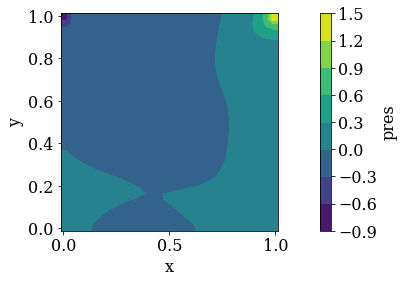

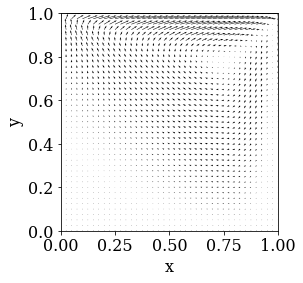

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_vector(gridx,gridy,'velc')